<h2 style = "color: chocolate">Consumo Tiendas Las Condes</h2>

In [1]:
import pandas as pd
import numpy as np
import ipywidgets
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
import pandas as pd
import numpy as np
from fiona.drvsupport import supported_drivers
import googlemaps
from datetime import datetime
import ee
import geemap
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot
from shapely.geometry import shape
import rasterio.features
from sklearn.preprocessing import StandardScaler
import os
import elevation
import rioxarray as riox
from rasterio.plot import show
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

c:\Users\Diego\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel("./data/ventas.xlsx")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307547 entries, 0 to 307546
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307547 non-null  int64  
 1   MONTH             307547 non-null  int64  
 2   SUPPLIER          307380 non-null  object 
 3   ITEM CODE         307547 non-null  object 
 4   ITEM DESCRIPTION  307547 non-null  object 
 5   ITEM TYPE         307539 non-null  object 
 6   RETAIL SALES      307537 non-null  object 
 7   RETAIL TRANSFERS  307540 non-null  float64
 8   WAREHOUSE SALES   307540 non-null  float64
 9   Unnamed: 9        38 non-null      float64
dtypes: float64(3), int64(2), object(5)
memory usage: 23.5+ MB


In [4]:
tiendas = ['oxxo', 'ok', 'spid']
probabilidades = [0.70, 0.185, 0.115]

def asignar_tienda(grupo):
    grupo['TIENDA'] = np.random.choice(tiendas, size=len(grupo), p=probabilidades)
    return grupo


In [5]:
df = df.groupby('MONTH', group_keys=False).apply(asignar_tienda)

C:\Users\Diego\AppData\Local\Temp\ipykernel_21436\2701198909.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('MONTH', group_keys=False).apply(asignar_tienda)


In [6]:
oxxos = ['oxxo_1', 'oxxo_10', 'oxxo_11', 'oxxo_12', 'oxxo_13', 'oxxo_14',
       'oxxo_15', 'oxxo_16', 'oxxo_17', 'oxxo_18', 'oxxo_2', 'oxxo_20',
       'oxxo_21', 'oxxo_22', 'oxxo_23', 'oxxo_24', 'oxxo_25', 'oxxo_26',
       'oxxo_27', 'oxxo_28', 'oxxo_29', 'oxxo_3', 'oxxo_30', 'oxxo_31',
       'oxxo_32', 'oxxo_33', 'oxxo_34', 'oxxo_35', 'oxxo_36', 'oxxo_37',
       'oxxo_38', 'oxxo_39', 'oxxo_4', 'oxxo_40', 'oxxo_41', 'oxxo_42',
       'oxxo_43', 'oxxo_44', 'oxxo_45', 'oxxo_5', 'oxxo_6', 'oxxo_7',
       'oxxo_8', 'oxxo_9']
ok_markets = ['ok_market_1', 'ok_market_10', 'ok_market_11', 'ok_market_12',
              'ok_market_2', 'ok_market_3', 'ok_market_4', 'ok_market_5',
              'ok_market_6', 'ok_market_7', 'ok_market_8', 'ok_market_9']

spids = ['spid_1', 'spid_2', 'spid_3', 'spid_4', 'spid_5', 'spid_6', 'spid_7']

def asignar_tienda_detalle(grupo):
    for tipo, lista in zip(['oxxo', 'ok', 'spid'], [oxxos, ok_markets, spids]):
        mask = grupo['TIENDA'] == tipo
        grupo.loc[mask, 'Tienda_asignada'] = np.random.choice(lista, size=mask.sum(), replace=True)
    return grupo

In [7]:
df = df.groupby('MONTH', group_keys=False).apply(asignar_tienda_detalle)

C:\Users\Diego\AppData\Local\Temp\ipykernel_21436\3247490938.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('MONTH', group_keys=False).apply(asignar_tienda_detalle)


In [8]:
df['Tienda_asignada'].unique()

array(['oxxo_14', 'oxxo_25', 'oxxo_13', 'oxxo_2', 'spid_5', 'oxxo_34',
       'oxxo_36', 'oxxo_7', 'oxxo_44', 'spid_6', 'oxxo_39', 'oxxo_15',
       'oxxo_45', 'oxxo_6', 'ok_market_3', 'oxxo_43', 'spid_3',
       'ok_market_2', 'ok_market_8', 'oxxo_4', 'oxxo_10', 'oxxo_9',
       'oxxo_23', 'oxxo_37', 'ok_market_4', 'oxxo_12', 'oxxo_32',
       'oxxo_28', 'oxxo_3', 'ok_market_10', 'ok_market_6', 'oxxo_18',
       'oxxo_30', 'oxxo_5', 'spid_7', 'oxxo_1', 'oxxo_33', 'spid_4',
       'oxxo_21', 'oxxo_8', 'ok_market_1', 'oxxo_41', 'oxxo_29',
       'oxxo_22', 'oxxo_20', 'oxxo_11', 'oxxo_35', 'ok_market_9',
       'oxxo_17', 'ok_market_5', 'ok_market_7', 'oxxo_42', 'oxxo_27',
       'spid_2', 'oxxo_26', 'spid_1', 'ok_market_11', 'oxxo_24',
       'oxxo_31', 'oxxo_40', 'oxxo_38', 'ok_market_12', 'oxxo_16'],
      dtype=object)

In [9]:
df['RETAIL SALES'] = df['RETAIL SALES'].astype(str).str.strip()

In [10]:
df['RETAIL SALES'] = df['RETAIL SALES'].str.replace(r'[^\d.-]', '', regex=True)

In [11]:
df['RETAIL SALES'] = pd.to_numeric(df['RETAIL SALES'], errors='coerce')

In [12]:
print(df['RETAIL SALES'].unique())

[  0.     0.82   2.76 ... 163.72  65.43 372.45]


In [13]:
df['ITEM TYPE'].unique()

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF', 'DUNNAGE',
       'NON-ALCOHOL', nan, ' - 750ML', '- 750ML'], dtype=object)

In [14]:
tiendas=df.groupby(['Tienda_asignada','ITEM TYPE']).agg(
    NUMERO_PRODUCTOS=('ITEM CODE', 'count'),     
    VENTAS_RETAIL=('RETAIL SALES', 'sum'),
    VENTAS_RETAIL_MEDIA=('RETAIL SALES', 'mean'),
    VENTAS_RETAIL_STD=('RETAIL SALES', 'std'),           
).reset_index()

In [15]:
tiendas

,Tienda_asignada,ITEM TYPE,NUMERO_PRODUCTOS,VENTAS_RETAIL,VENTAS_RETAIL_MEDIA,VENTAS_RETAIL_STD
0,ok_market_1,BEER,651,9267.56,14.235883,61.211872
1,ok_market_1,DUNNAGE,2,0.00,0.000000,0.000000
2,ok_market_1,KEGS,136,0.00,0.000000,0.000000
3,ok_market_1,LIQUOR,1002,9714.48,9.695090,27.994786
4,ok_market_1,NON-ALCOHOL,33,269.51,8.166970,11.848551
...,...,...,...,...,...,...
503,spid_7,LIQUOR,1141,12991.21,11.385811,27.153730
504,spid_7,NON-ALCOHOL,34,305.45,8.983824,13.482478
505,spid_7,REF,4,1.58,0.395000,0.684373
506,spid_7,STR_SUPPLIES,3,77.62,25.873333,44.727353


In [155]:
tiendas.to_csv('./data/ventas_agrupadas_producto.csv',index=False)

In [16]:
gdf = gpd.read_file('./data/tiendas.shp')

In [17]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       63 non-null     object  
 1   longitude  63 non-null     float64 
 2   latitude   63 non-null     float64 
 3   geometry   63 non-null     geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 2.1+ KB


In [18]:
gdf['name'] = gdf['name'].str.strip().str.lower()
tiendas['Tienda_asignada'] = tiendas['Tienda_asignada'].str.strip().str.lower()

In [19]:
df_merged = tiendas.merge(gdf, how='left', left_on='Tienda_asignada', right_on='name')

In [20]:
df_merged

,Tienda_asignada,ITEM TYPE,NUMERO_PRODUCTOS,VENTAS_RETAIL,VENTAS_RETAIL_MEDIA,VENTAS_RETAIL_STD,name,longitude,latitude,geometry
0,ok_market_1,BEER,651,9267.56,14.235883,61.211872,ok_market_1,-70.570593,-33.409976,POINT (-70.57059 -33.40998)
1,ok_market_1,DUNNAGE,2,0.00,0.000000,0.000000,ok_market_1,-70.570593,-33.409976,POINT (-70.57059 -33.40998)
2,ok_market_1,KEGS,136,0.00,0.000000,0.000000,ok_market_1,-70.570593,-33.409976,POINT (-70.57059 -33.40998)
3,ok_market_1,LIQUOR,1002,9714.48,9.695090,27.994786,ok_market_1,-70.570593,-33.409976,POINT (-70.57059 -33.40998)
4,ok_market_1,NON-ALCOHOL,33,269.51,8.166970,11.848551,ok_market_1,-70.570593,-33.409976,POINT (-70.57059 -33.40998)
...,...,...,...,...,...,...,...,...,...,...
503,spid_7,LIQUOR,1141,12991.21,11.385811,27.153730,spid_7,-70.546475,-33.408324,POINT (-70.54648 -33.40832)
504,spid_7,NON-ALCOHOL,34,305.45,8.983824,13.482478,spid_7,-70.546475,-33.408324,POINT (-70.54648 -33.40832)
505,spid_7,REF,4,1.58,0.395000,0.684373,spid_7,-70.546475,-33.408324,POINT (-70.54648 -33.40832)
506,spid_7,STR_SUPPLIES,3,77.62,25.873333,44.727353,spid_7,-70.546475,-33.408324,POINT (-70.54648 -33.40832)


In [21]:
gdf_resultado = gpd.GeoDataFrame(df_merged, geometry='geometry',crs='4326')

In [161]:
gdf_resultado.to_file('./data/tiendas_ventas.shp')

C:\Users\Diego\AppData\Local\Temp\ipykernel_17476\1103018259.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_resultado.to_file('./data/tiendas_ventas.shp')


In [22]:
las_condes = gpd.read_file('./data/poligonos/las_condes.shp')

In [23]:
gdf_resultado = gpd.read_file('./data/tiendas_ventas.shp')

In [24]:
las_condes = las_condes.to_crs('32719')
gdf_resultado =  gdf_resultado.to_crs('32719')

In [25]:
from scipy.interpolate import griddata
from scipy.spatial import Voronoi, voronoi_plot_2d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [26]:
gdf_resultado = gdf_resultado[gdf_resultado['ITEM TYPE']=='BEER']

In [29]:
gdf_resultado['name'].unique()

array(['ok_market_1', 'ok_market_10', 'ok_market_11', 'ok_market_12',
       'ok_market_2', 'ok_market_3', 'ok_market_4', 'ok_market_5',
       'ok_market_6', 'ok_market_7', 'ok_market_8', 'ok_market_9',
       'oxxo_1', 'oxxo_10', 'oxxo_11', 'oxxo_12', 'oxxo_13', 'oxxo_14',
       'oxxo_15', 'oxxo_16', 'oxxo_17', 'oxxo_18', 'oxxo_2', 'oxxo_20',
       'oxxo_21', 'oxxo_22', 'oxxo_23', 'oxxo_24', 'oxxo_25', 'oxxo_26',
       'oxxo_27', 'oxxo_28', 'oxxo_29', 'oxxo_3', 'oxxo_30', 'oxxo_31',
       'oxxo_32', 'oxxo_33', 'oxxo_34', 'oxxo_35', 'oxxo_36', 'oxxo_37',
       'oxxo_38', 'oxxo_39', 'oxxo_4', 'oxxo_40', 'oxxo_41', 'oxxo_42',
       'oxxo_43', 'oxxo_44', 'oxxo_45', 'oxxo_5', 'oxxo_6', 'oxxo_7',
       'oxxo_8', 'oxxo_9', 'spid_1', 'spid_2', 'spid_3', 'spid_4',
       'spid_5', 'spid_6', 'spid_7'], dtype=object)

In [30]:
gdf_resultado['tienda_name'] = gdf_resultado['name'].str.extract(r'^(oxxo|ok_market|spid)')

In [32]:
gdf_resultado['tienda_name'].unique()

array(['ok_market', 'oxxo', 'spid'], dtype=object)

<p>Mapa con las Tiendas</p>

In [76]:
import contextily as ctx

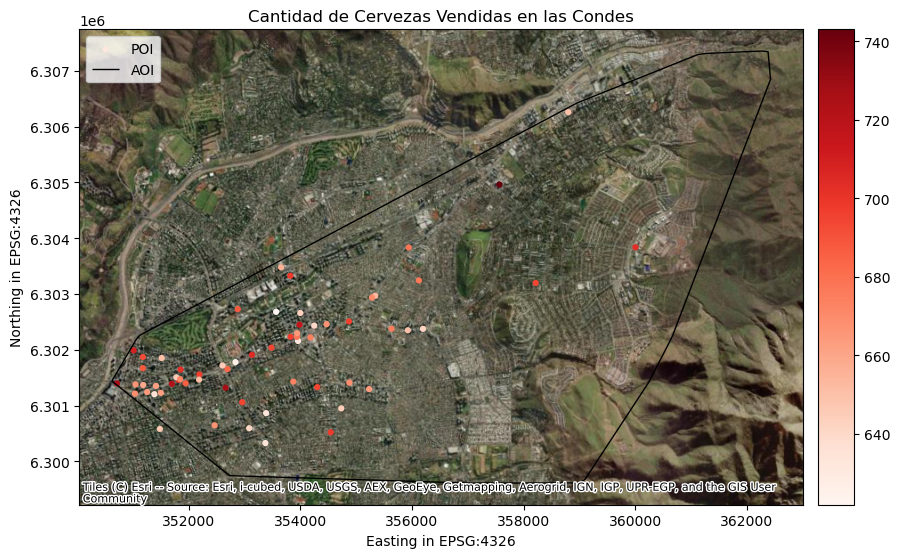

In [83]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
cax = make_axes_locatable(ax).append_axes("right", size="5%", pad="2%")
gdf_resultado.plot(ax=ax,column='NUMERO_PRO',markersize=12,legend=True,cmap='Reds',cax=cax, label='POI',marker ='o')
las_condes.boundary.plot(ax=ax,color='black',lw=1, label='AOI')
ax.legend(loc='upper left')
ctx.add_basemap(ax,crs='EPSG:32719', source=ctx.providers.Esri.WorldImagery)

ax.set_title('Cantidad de Cervezas Vendidas en las Condes')
ax.set_xlabel('Easting in EPSG:4326')
ax.set_ylabel('Northing in EPSG:4326')
ax.set_aspect('equal')

In [94]:
gdf_resultado['x']=gdf_resultado.centroid.x
gdf_resultado['y']=gdf_resultado.centroid.y
gdf_resultado['z']=gdf_resultado['VENTAS_R_2']

gdf_resultado.head()

,Tienda_asi,ITEM TYPE,NUMERO_PRO,VENTAS_RET,VENTAS_R_1,VENTAS_R_2,name,longitude,latitude,geometry,tienda_name,x,y,z
0,ok_market_1,BEER,632,9189.43,14.540237,47.877634,ok_market_1,-70.570593,-33.409976,POINT (353956.801 6302159.253),ok_market,353956.800763,6.302159e+06,47.877634
8,ok_market_10,BEER,666,7927.36,11.902943,65.397547,ok_market_10,-70.602023,-33.416581,POINT (351045.244 6301382.289),ok_market,351045.243512,6.301382e+06,65.397547
15,ok_market_11,BEER,636,8493.85,13.355110,58.807783,ok_market_11,-70.598420,-33.418225,POINT (351383.102 6301205.111),ok_market,351383.101787,6.301205e+06,58.807783
23,ok_market_12,BEER,647,9501.63,14.685672,69.066100,ok_market_12,-70.597477,-33.423840,POINT (351480.328 6300583.912),ok_market,351480.327644,6.300584e+06,69.066100
31,ok_market_2,BEER,622,7608.08,12.231640,43.935237,ok_market_2,-70.574727,-33.405217,POINT (353564.377 6302681.098),ok_market,353564.376801,6.302681e+06,43.935237


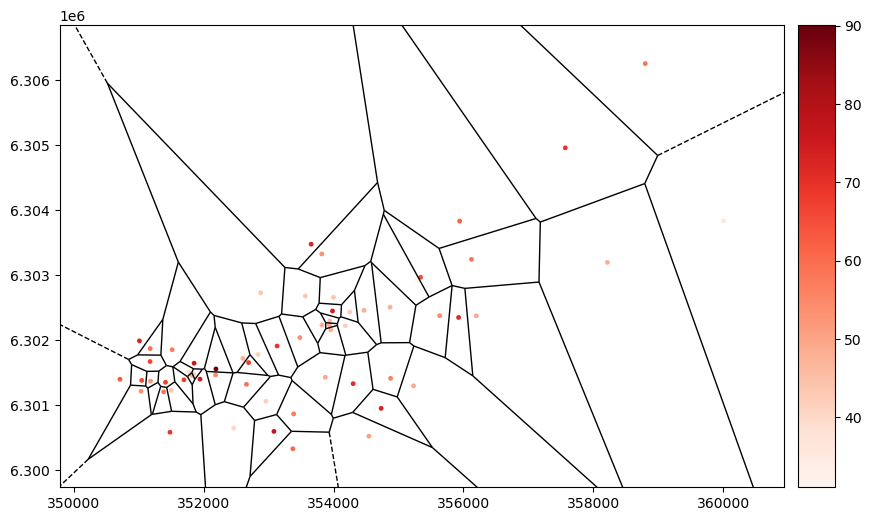

In [95]:
points=np.array([[x,y] for x,y, in zip(gdf_resultado.x,gdf_resultado.y)])
values =np.array([z for z in gdf_resultado.z])
vor = Voronoi(points)

#graficamos los poligonos de Voronoi y los datos observados
fig, ax = plt.subplots(1, 1, figsize=(10,10))
cax = make_axes_locatable(ax).append_axes("right", size="5%", pad="2%")

art = ax.scatter(gdf_resultado.x,gdf_resultado.y, s=6, c=gdf_resultado.z, cmap='Reds')
voronoi_plot_2d(vor,ax=ax,show_vertices=False,show_points=False)
ax.set_aspect('equal')
plt.colorbar(art,cax=cax);

In [96]:
gdf_grilla = gpd.read_file('./data/poligonos/datos_poligonos.shp')

In [88]:
gdf_grilla.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 131822 entries, 0 to 131821
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   distancia_  131822 non-null  float64 
 1   distanci_1  100 non-null     float64 
 2   universida  100 non-null     float64 
 3   distanci_2  131822 non-null  float64 
 4   distanci_3  131822 non-null  float64 
 5   distanci_4  131822 non-null  float64 
 6   distanci_5  131822 non-null  float64 
 7   distanci_6  131822 non-null  float64 
 8   distanci_7  131822 non-null  float64 
 9   distanci_8  131822 non-null  float64 
 10  distanci_9  131822 non-null  float64 
 11  distanci10  131822 non-null  float64 
 12  distanci11  131822 non-null  float64 
 13  distanci12  131822 non-null  float64 
 14  calles      131822 non-null  int64   
 15  class_name  131822 non-null  object  
 16  calles_0    131822 non-null  float64 
 17  calles_1    131822 non-null  float64 
 18  calles_2    1318

In [97]:
gdf_grilla['x']=gdf_grilla.centroid.x
gdf_grilla['y']=gdf_grilla.centroid.y

(11970, 7856) (11970, 7856)
(11970, 7856)


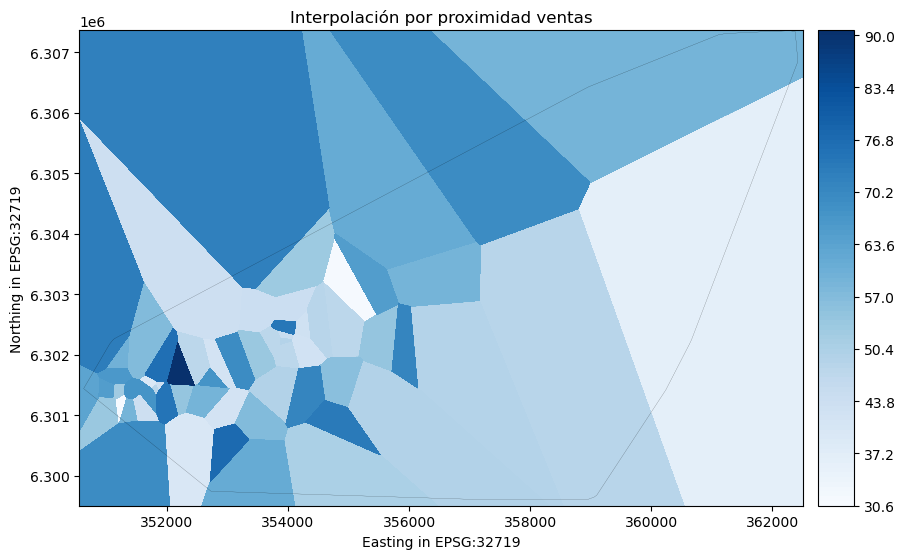

In [98]:
#grilla de puntos para los cuales interpolaremos, entre xmin:xmax e ymin_ymax con espaciamiento de 100 m
grid_x, grid_y = np.mgrid[gdf_grilla.x.min():gdf_grilla.x.max(), gdf_grilla.y.min():gdf_grilla.y.max()]
print(grid_x.shape,grid_y.shape)

z_vor = griddata(points, values, (grid_x, grid_y), method='nearest')
print(z_vor.shape)

fig,ax=plt.subplots(1,1,figsize=(10,10))
cax = make_axes_locatable(ax).append_axes("right", size="5%", pad="2%")

im=ax.contourf(grid_x,grid_y,z_vor, 100, cmap='Blues', origin='lower')
las_condes.boundary.plot(ax=ax,color='k',lw=0.1)
ax.set_aspect('equal')
ax.set_title('Interpolación por proximidad ventas')
ax.set_xlabel('Easting in EPSG:32719');ax.set_ylabel('Northing in EPSG:32719')
plt.colorbar(im,cax=cax);

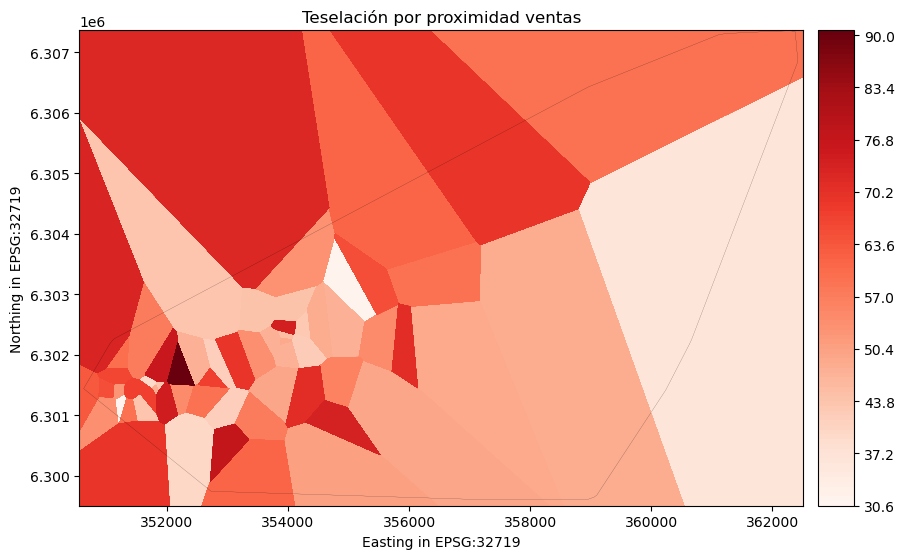

In [92]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
cax = make_axes_locatable(ax).append_axes("right", size="5%", pad="2%")

im=ax.contourf(grid_x,grid_y,z_vor, 100, cmap='Reds', origin='lower')
las_condes.boundary.plot(ax=ax,color='k',lw=0.1)
ax.set_aspect('equal')
ax.set_title('Teselación por proximidad ventas')
ax.set_xlabel('Easting in EPSG:32719');ax.set_ylabel('Northing in EPSG:32719')

plt.colorbar(im,cax=cax);

In [99]:
gdf_grilla['z_vor_std'] = griddata(
    points,         
    values,        
    (gdf_grilla['x'], gdf_grilla['y']), 
    method='nearest'
)

In [101]:
gdf_grilla.to_file('./data/Modelos.shp')

In [182]:
z_vor.shape

(11970, 7856)

In [140]:
import math
from scipy.spatial import distance_matrix

def dist(x1,y1,x2,y2):#calcula la distancia entre dos puntos (x1,y1) y (x2,y2)
    d=math.sqrt((x1-x2)**2+(y1-y2)**2)
    return(d)

def idwr(x, y, z, xi, yi,n):
    #xi,yi: puntos donde queremos estimar z
    #x,y,z: observaciones
    #n: potencia inversa de d
    
    lstzi=[]
    for p in range(len(xi)): #iteramos sobre todos los puntos de la grilla
        lstdist = [] #lista donde guardamos las distancias a todos los puntos observados
        #iteramos sobre los elementos de los vectores (x,y,z)
        for s in range(len(x)):
            d = dist(x[s], y[s], xi[p], yi[p])
            lstdist.append(d)
        lstdist=np.array(lstdist)
        weights=1/np.power(lstdist, n)
        zi = np.sum(np.array(z)*weights)/np.sum(weights)
        lstzi.append(zi)
    return(np.array(lstzi))

def idwr2(x, y, z, xi, yi,n):
    #xi,yi: puntos donde queremos estimar z
    #x,y,z: observaciones
    points=np.array([[x,y] for x,y, in zip(x,y)]) 
    
    lstzi=[]
    for p in range(len(xi)):
        lstdist = [] #lista donde guardamos las distancias a todos los puntos observados
        #iteramos sobre los elementos de los vectores (x,y,z)
        dists=distance_matrix([[xi[p], yi[p]]],points)
        
        weights=1/np.power(dists, n)
        zi = np.sum(np.array(z)*weights)/np.sum(weights)
        lstzi.append(zi)
    return(np.array(lstzi))

In [142]:
#nuevamente, nuestras obsevaciones
x=gdf_resultado.x
y=gdf_resultado.y
z=values

#observaciones
points=np.array([[x,y] for x,y, in zip(gdf_resultado.x,gdf_resultado.y)])
values =np.array([z for z in gdf_resultado.z])

#grilla
xi=np.arange(gdf_grilla.x.min(),gdf_grilla.x.max())#100 metros los saltos
yi=np.arange(gdf_grilla.y.min(),gdf_grilla.y.max())

#convertimos los vectores xi,yi en una grilla 2d
xx, yy = np.meshgrid(xi,yi)

#xx.flatten(),yy.flatten() son las coordenadas de cada punto de la grilla
gpoints=np.array([[x,y] for x,y, in zip(xx.flatten(),yy.flatten())])


In [ ]:
values_idw=idwr2(x,y,values,xx.flatten(),yy.flatten(),0)

In [117]:
z_idw=np.reshape(values_idw,xx.shape)

Text(0.5, 1.0, 'Voronoi')

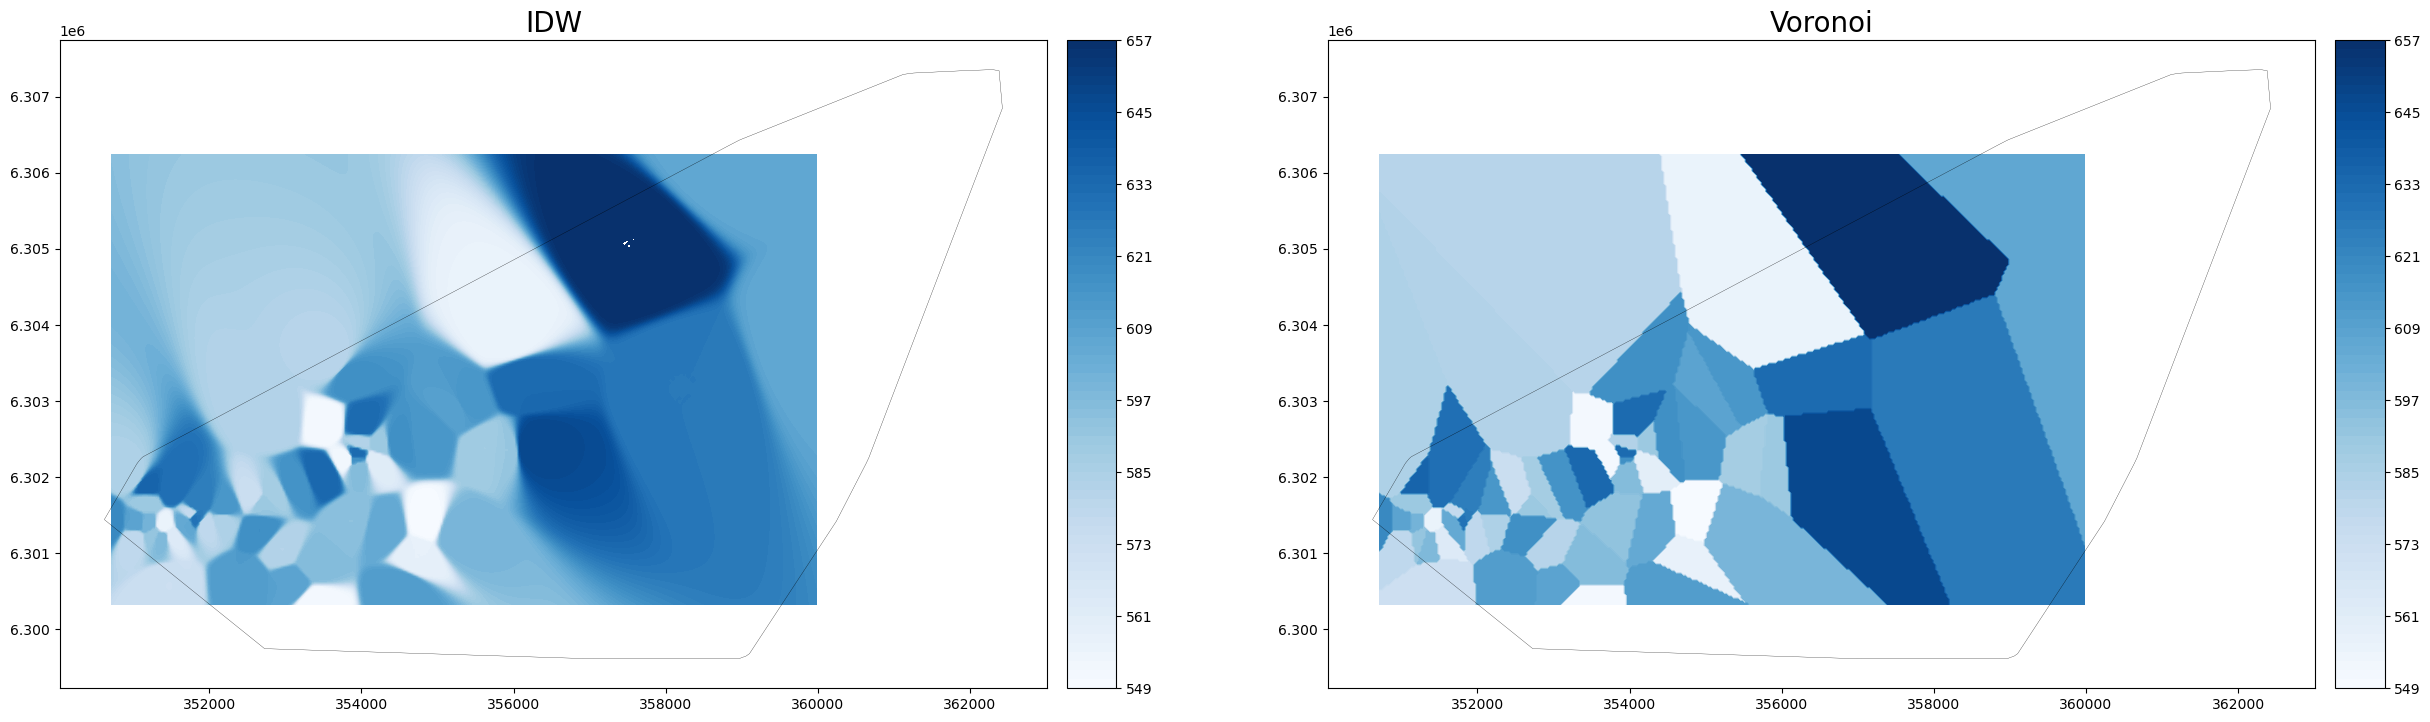

In [118]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,10))

las_condes.boundary.plot(ax=ax1,color='k',lw=0.2)
cax1 = make_axes_locatable(ax1).append_axes("right", size="5%", pad="2%")

im1=ax1.contourf(xx,yy,z_idw, 100, cmap='Blues', origin='lower')
plt.colorbar(im1,ax=ax1,cax=cax1)
ax1.set_title('IDW',fontsize=20)

im2=ax2.contourf(grid_x,grid_y,z_vor, 100, cmap='Blues', origin='lower')
cax2 = make_axes_locatable(ax2).append_axes("right", size="5%", pad="2%")

plt.colorbar(im2,ax=ax2,cax=cax2)
las_condes.boundary.plot(ax=ax2,color='k',lw=0.2)

ax2.set_title('Voronoi',fontsize=20)